In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'
import warnings; warnings.simplefilter('ignore')

from __future__ import absolute_import, division, print_function

import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

# Display and Plotting
import matplotlib.pylab as plt
import seaborn as sns

from ipywidgets import interactive, widgets, RadioButtons, ToggleButton, Select, FloatSlider, FloatRangeSlider, IntSlider, fixed

pd.set_option('display.float_format', lambda x: '%.5f' % x) # pandas
np.set_printoptions(precision=5, suppress=True) # numpy

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# seaborn plotting style
sns.set(style='ticks', context='poster')

### Comman characteristics of time series

* Trend
* Seasonality
* Cycles
* Combination of the above

### Pattern 1: Trend and Fluctuation around the Trend

In [12]:
air = pd.read_csv('data/international-airline-passengers.csv', header=0, index_col=0, parse_dates=[0])

In [13]:
air.head(2)

,n_pass_thousands
Month,
1949-01-01,112
1949-02-01,118


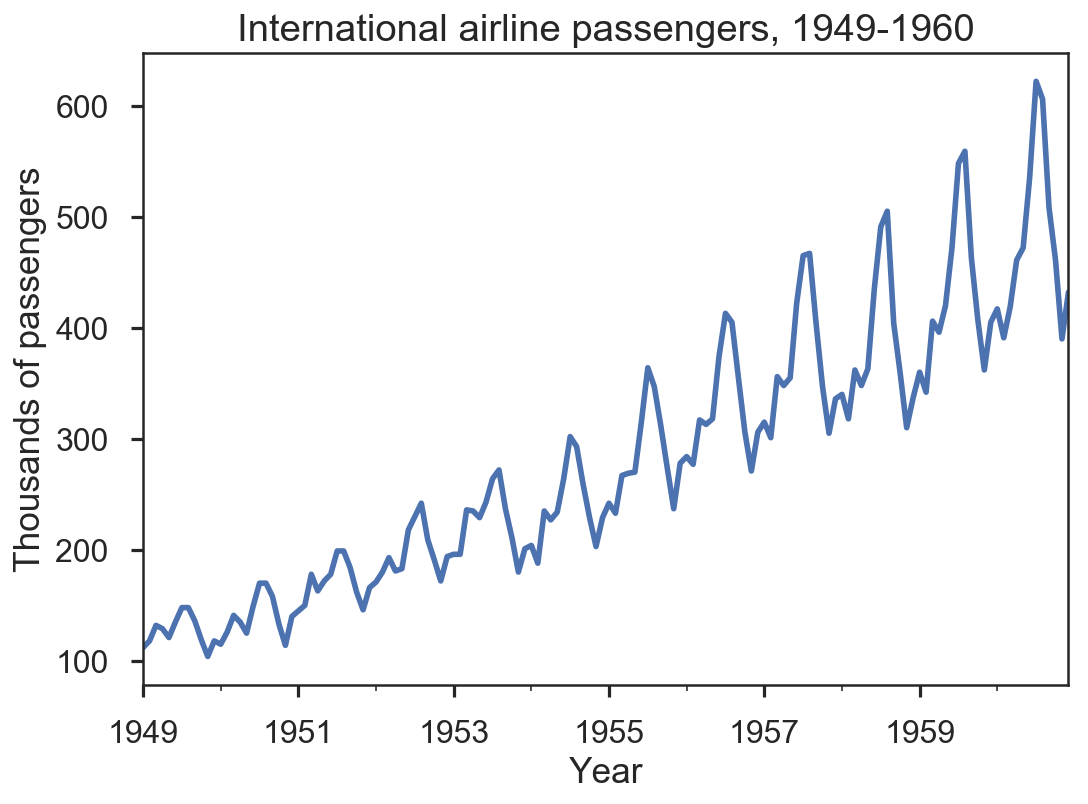

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
air['n_pass_thousands'].plot(ax=ax)

ax.set_title('International airline passengers, 1949-1960')
ax.set_ylabel('Thousands of passengers')
ax.set_xlabel('Year')
ax.xaxis.set_ticks_position('bottom')
fig.tight_layout()

### Examine annual trend in the data

[Resampling time series data with pandas](http://benalexkeen.com/resampling-time-series-data-with-pandas/)

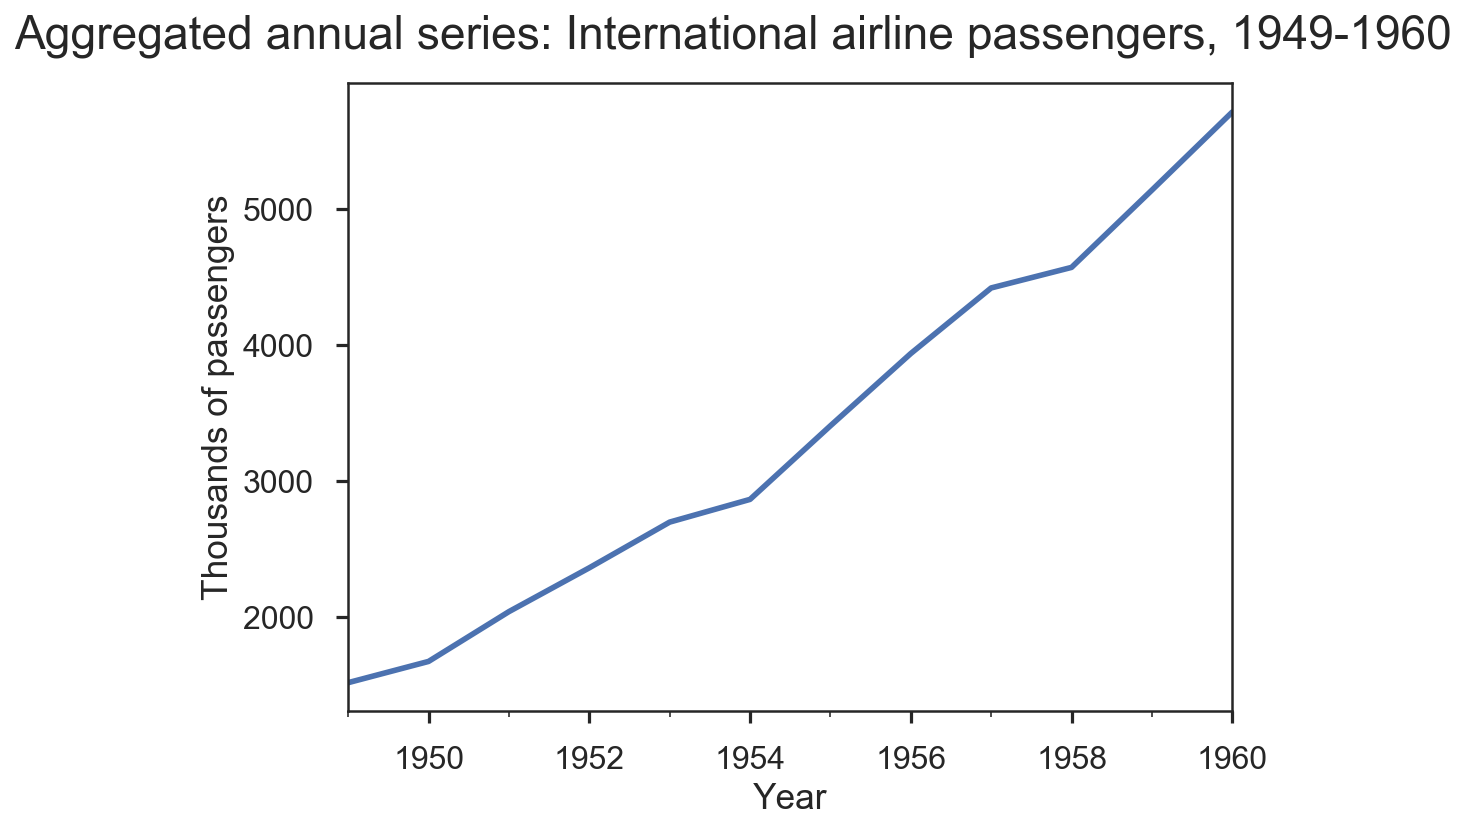

In [16]:
fig, ax = plt.subplots(figsize=(8,6))

air['n_pass_thousands'].resample('AS').sum().plot(ax=ax)

fig.suptitle('Aggregated annual series: International airline passengers, 1949-1960');
ax.set_ylabel('Thousands of passengers');
ax.set_xlabel('Year');
ax.xaxis.set_ticks_position('bottom')
fig.tight_layout();
fig.subplots_adjust(top=0.9)

### Examine seasonal trend in the data

In [27]:
air['Month'] = air.index.strftime('%b')
air['Year'] = air.index.year

In [28]:
air.head()

,n_pass_thousands,Month,Year
Month,,,
1949-01-01,112,Jan,1949
1949-02-01,118,Feb,1949
1949-03-01,132,Mar,1949
1949-04-01,129,Apr,1949
1949-05-01,121,May,1949


In [29]:
# Pivot: Reshape data based on column values. pandas.DataFrame.pivot
air_piv = air.pivot(index='Year',columns='Month',values='n_pass_thousands')

In [30]:
air_piv.head(5)

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
1949,129,148,118,118,112,148,135,132,121,104,119,136
1950,135,170,140,126,115,170,149,141,125,114,133,158
1951,163,199,166,150,145,199,178,178,172,146,162,184
1952,181,242,194,180,171,230,218,193,183,172,191,209
1953,235,272,201,196,196,264,243,236,229,180,211,237


In [31]:
air = air.drop(['Month','Year'], axis=1)

In [32]:
# Put the months in order
month_names = pd.date_range(start='2016-01-01', periods=12, freq='MS').strftime('%b')
air_piv = air_piv.reindex(columns=month_names)

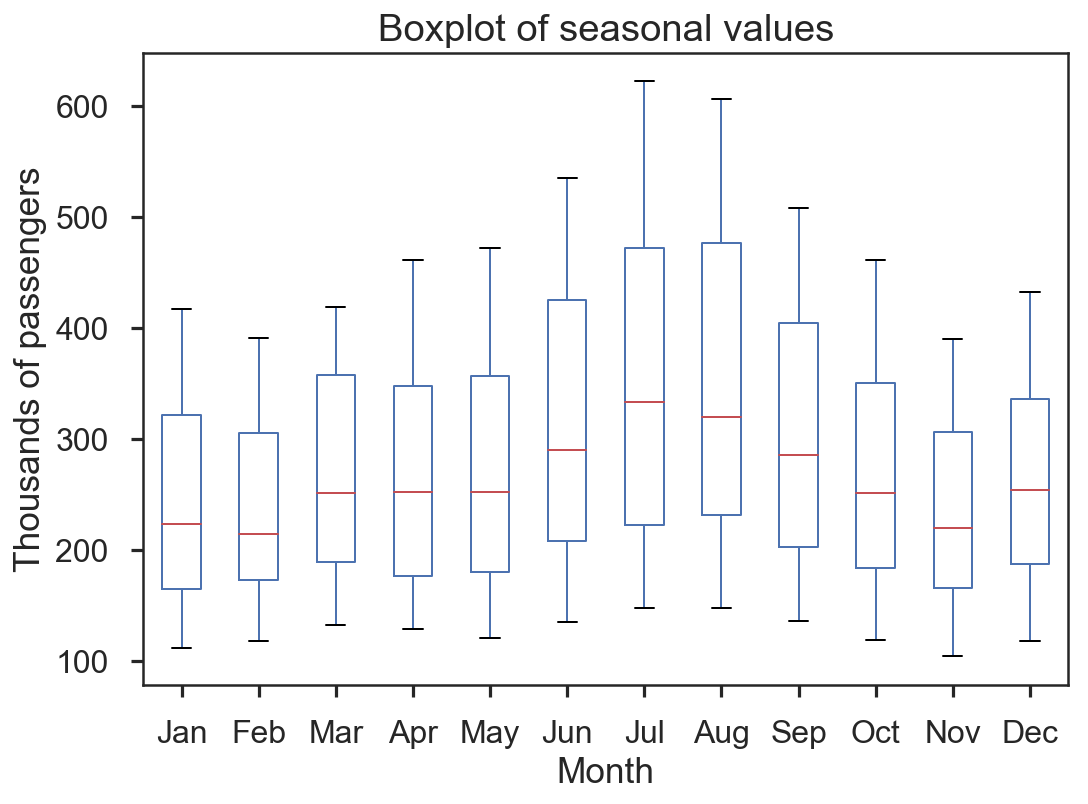

In [33]:
fig, ax = plt.subplots(figsize=(8,6))
air_piv.plot(ax=ax, kind='box')
ax.set_xlabel('Month')
ax.set_ylabel('Thousands of passengers')
ax.set_title('Boxplot of seasonal values')
ax.xaxis.set_ticks_position('bottom')
fig.tight_layout()